In [1]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

In [2]:
#Read in the csv file and convert to a Pandas dataframe
happiness_df = {'2015' : pd.read_csv("Data/2015.csv"),
                '2016' : pd.read_csv("Data/2016.csv"),
                '2017' : pd.read_csv("Data/2017.csv"),
                '2018' : pd.read_csv("Data/2018.csv"),
                '2019' : pd.read_csv("Data/2019.csv")}

### Viewing the dataframe

In [3]:
happiness_df["2015"].head()
happiness_df["2016"].head()
happiness_df["2017"].head()
happiness_df["2018"].head()
happiness_df["2019"].head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## 1. Data Profiling:
 

In [4]:
happiness_df["2015"].info()
happiness_df["2016"].info()
happiness_df["2017"].info()
happiness_df["2018"].info()
happiness_df["2019"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [5]:
happiness_df["2015"].shape
happiness_df["2016"].shape
happiness_df["2017"].shape
happiness_df["2018"].shape
happiness_df["2019"].shape

(156, 9)

In [6]:
happiness_df["2015"].columns
happiness_df["2016"].columns
happiness_df["2017"].columns
happiness_df["2018"].columns
happiness_df["2019"].columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

### Data Quality Checks

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [ ]:
#kaggle (no source or collection method mentioned)
#not very relaible data but we still want to get some insights out of it.

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [8]:
#2019 was the last update we found on the data given to us by kaggle. 

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [9]:
display(happiness_df["2015"].head(2))
display(happiness_df["2016"].head(2))
display(happiness_df["2017"].head(2))
display(happiness_df["2018"].head(2))
display(happiness_df["2019"].head(2))

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410


#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [10]:
happiness_df["2019"] = happiness_df["2019"].rename(columns={"Country or region":'Country',
                                                            "rank":"Happiness Rank",
                                                            "Score":"Happiness Score",
                                                            "GDP per capita":"Economy (GDP per Capita)",
                                                            "Family":"Social support",
                                                            "Healthy life expectancy":"Health (Life Expectancy)",
                                                            "Freedom":"Freedom to make life choices",
                                                            "Perceptions of corruption":"Trust (Government Corruption)"})

happiness_df["2018"] = happiness_df["2018"].rename(columns={"Country or region":'Country',
                                                            "rank":"Happiness Rank",
                                                            "Score":"Happiness Score",
                                                            "GDP per capita":"Economy (GDP per Capita)",
                                                            "Family":"Social support",
                                                            "Healthy life expectancy":"Health (Life Expectancy)",
                                                            "Freedom":"Freedom to make life choices",
                                                            "Perceptions of corruption":"Trust (Government Corruption)"})

happiness_df["2017"] = happiness_df["2017"].rename(columns={"Happiness.Rank":'Happiness Rank',
                                                            "Happiness.Score":'Happiness Score',
                                                            "Economy..GDP.per.Capita.":'Economy (GDP per Capita)',
                                                            "Family":"Social support",
                                                            "Health..Life.Expectancy.":"Health (Life Expectancy)",
                                                            "Freedom":"Freedom to make life choices",
                                                            "Trust..Government.Corruption.":"Trust (Government Corruption)"})



happiness_df["2016"] = happiness_df["2016"].rename(columns={"Family":"Social support",
                                                           "Freedom":"Freedom to make life choices"})

happiness_df["2015"] = happiness_df["2015"].rename(columns={"Family":"Social support",
                                                           "Freedom":"Freedom to make life choices"})

In [11]:
display(happiness_df["2015"].head(2))
display(happiness_df["2016"].head(2))
display(happiness_df["2017"].head(2))
display(happiness_df["2018"].head(2))
display(happiness_df["2019"].head(2))

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom to make life choices,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom to make life choices,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463


,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom to make life choices,Generosity,Trust (Government Corruption),Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


,Overall rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom to make life choices,Generosity,Trust (Government Corruption)
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340


,Overall rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom to make life choices,Generosity,Trust (Government Corruption)
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410


In [12]:
#possibly (standard error, confidence intervals, whiskers),
#but they might be useful for accuracy later on,
#so i think we should keep them for now

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [13]:
happiness_df["2015"].duplicated().sum()
happiness_df["2016"].duplicated().sum()
happiness_df["2017"].duplicated().sum()
happiness_df["2018"].duplicated().sum()
happiness_df["2019"].duplicated().sum()

0

In [14]:
# go to delete duplicates columns
#no duplicated columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [15]:
#Display number missing values per column
happiness_df["2015"].isnull().sum().sort_values(ascending = False)
happiness_df["2016"].isnull().sum().sort_values(ascending = False)
happiness_df["2017"].isnull().sum().sort_values(ascending = False)
happiness_df["2018"].isnull().sum().sort_values(ascending = False)
happiness_df["2019"].isnull().sum().sort_values(ascending = False)
happiness_df["2018"][happiness_df["2018"]['Trust (Government Corruption)'].isnull()]

,Overall rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom to make life choices,Generosity,Trust (Government Corruption)
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN


In [16]:
happiness_df["2018"][happiness_df["2018"]['Trust (Government Corruption)'].isnull()]

,Overall rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom to make life choices,Generosity,Trust (Government Corruption)
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN


In [17]:
# go to clean them (1 null value in 2018 UAE)

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [18]:
# check columns types 
happiness_df["2015"].dtypes
happiness_df["2016"].dtypes
happiness_df["2017"].dtypes
happiness_df["2018"].dtypes
happiness_df["2019"].dtypes

Overall rank                       int64
Country                           object
Happiness Score                  float64
Economy (GDP per Capita)         float64
Social support                   float64
Health (Life Expectancy)         float64
Freedom to make life choices     float64
Generosity                       float64
Trust (Government Corruption)    float64
dtype: object

In [19]:
# go to clean them in cleaning

In [20]:
happiness_df["2015"].head(2)
happiness_df["2016"].head(2)
happiness_df["2017"].head(2)
happiness_df["2018"].head(2)
happiness_df["2019"].head(2)

,Overall rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom to make life choices,Generosity,Trust (Government Corruption)
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410


## 2. Data Cleaning: 



### Handling missing values:

In [24]:
#we already checked that UAE is the null value above
happiness_df["2018"][happiness_df["2018"]['Trust (Government Corruption)'].isnull()]

,Overall rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom to make life choices,Generosity,Trust (Government Corruption)
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN


In [25]:
#since we know UAE is the problem, rather than taking forward or backward
#its better to take its value in all other years and get the mean
UAE_corruption_2015 = happiness_df["2015"][happiness_df["2015"]['Country'] == "United Arab Emirates"]['Trust (Government Corruption)'].sum()
UAE_corruption_2016 = happiness_df["2016"][happiness_df["2016"]['Country'] == "United Arab Emirates"]['Trust (Government Corruption)'].sum()
UAE_corruption_2017 = happiness_df["2017"][happiness_df["2017"]['Country'] == "United Arab Emirates"]['Trust (Government Corruption)'].sum()
UAE_corruption_2019 = happiness_df["2019"][happiness_df["2019"]['Country'] == "United Arab Emirates"]["Trust (Government Corruption)"].sum()

In [26]:
UAE_corruption_2018 = (UAE_corruption_2015 + UAE_corruption_2016 +
                       UAE_corruption_2017 + UAE_corruption_2019)/4
UAE_corruption_2018

0.3119823909258842

In [27]:
#now we replace the value
happiness_df["2018"].loc[19, "Trust (Government Corruption)"] = UAE_corruption_2018
happiness_df["2018"].loc[19]

Overall rank                                       20
Country                          United Arab Emirates
Happiness Score                                 6.774
Economy (GDP per Capita)                        2.096
Social support                                  0.776
Health (Life Expectancy)                         0.67
Freedom to make life choices                    0.284
Generosity                                      0.186
Trust (Government Corruption)                0.311982
Name: 19, dtype: object

In [28]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [29]:
#no errors to correct

In [30]:
# go back to 7th dimension Accuracy 

## 3. Univariate Analysis: 

### 1. Univariate Graphical Analysis:

In [31]:
happiness_df["2019"].head(2)

,Overall rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom to make life choices,Generosity,Trust (Government Corruption)
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410


#### I. Categorical Variables:

In [32]:
regions_2016 = happiness_df["2016"]["Region"].value_counts()
regions_2016

Region
Sub-Saharan Africa                 38
Central and Eastern Europe         29
Latin America and Caribbean        24
Western Europe                     21
Middle East and Northern Africa    19
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: count, dtype: int64

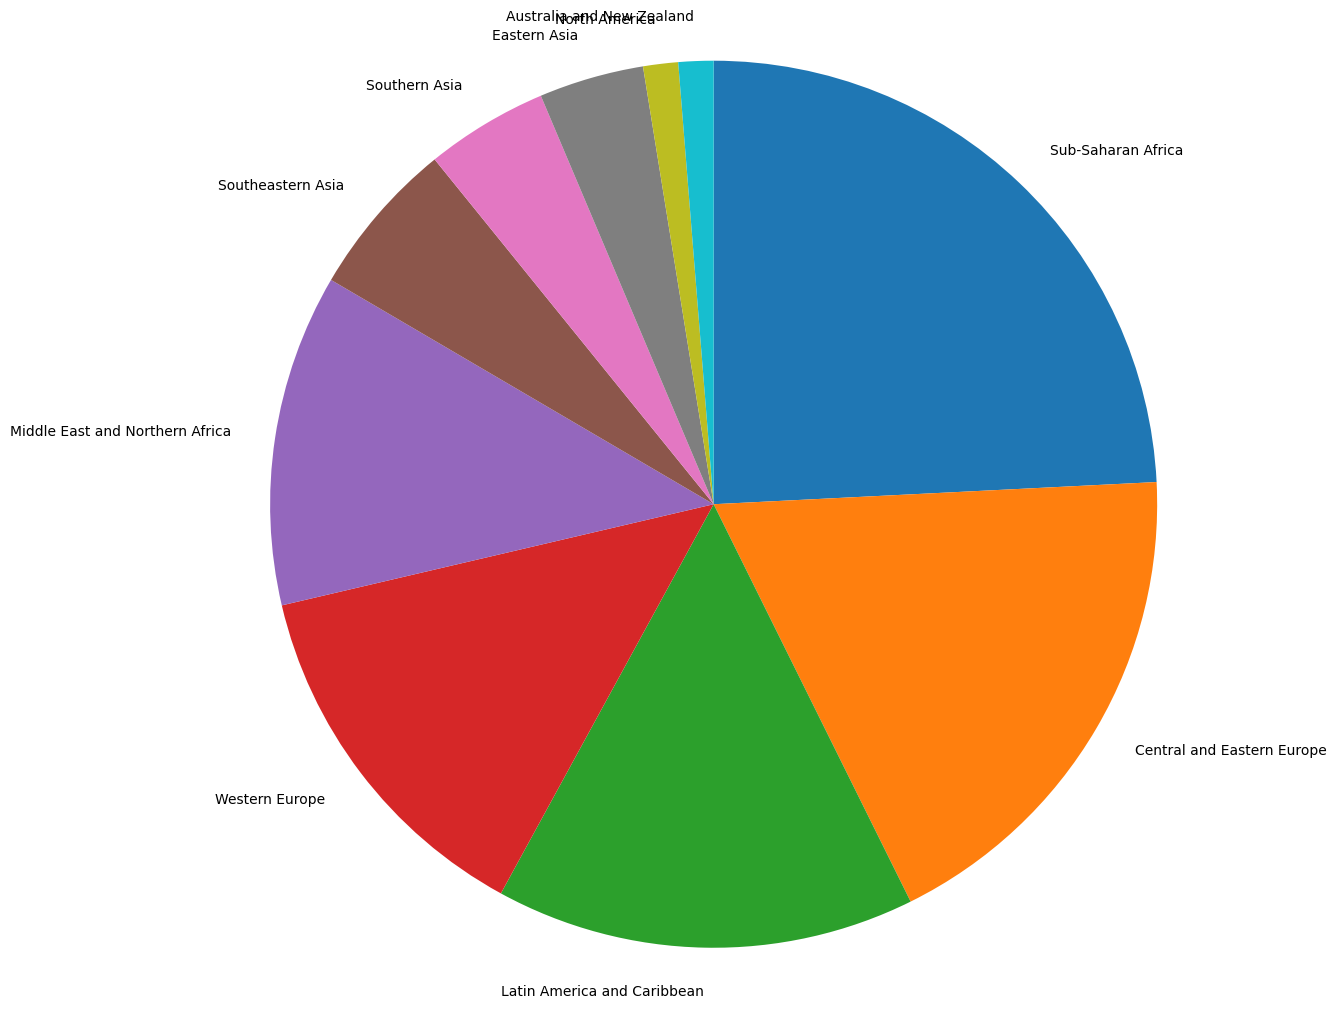

In [33]:
#shows us the number of countries in each region in our data
plt.pie(x=regions_2016.values,
        labels=regions_2016.index,
        startangle=90,
        counterclock=False,
        radius=3,
        )
plt.show()

<Axes: xlabel='Region'>

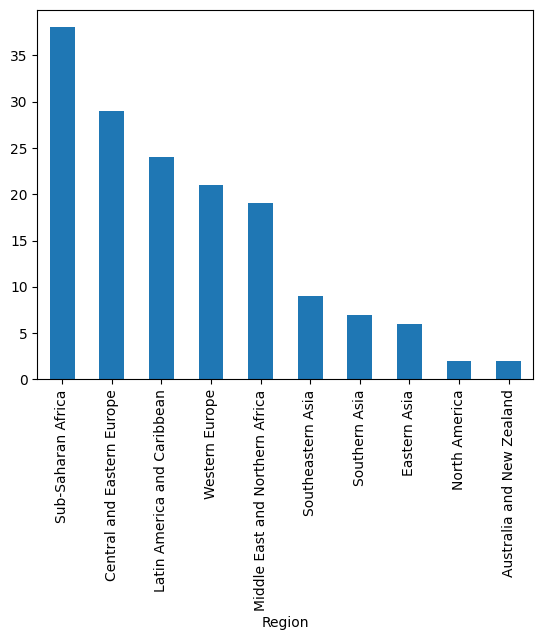

In [34]:
regions_2016.plot(kind="bar")

#### II. Numerical Variables:

In [35]:
score_2019 = (happiness_df["2019"]["Happiness Score"]>5).value_counts()
score_2019

Happiness Score
True     97
False    59
Name: count, dtype: int64

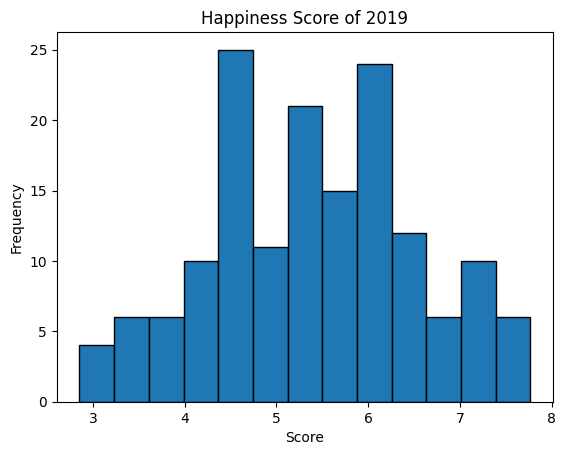

In [36]:
plt.hist(happiness_df["2019"]["Happiness Score"], edgecolor="black", bins=13)
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Happiness Score of 2019")
plt.show()

In [37]:
score_2015 = (happiness_df["2015"]["Happiness Score"]>5).value_counts()
score_2016 = (happiness_df["2016"]["Happiness Score"]>5).value_counts()
score_2017 = (happiness_df["2017"]["Happiness.Score"]>5).value_counts()
score_2018 = (happiness_df["2018"]["Score"]>5).value_counts()

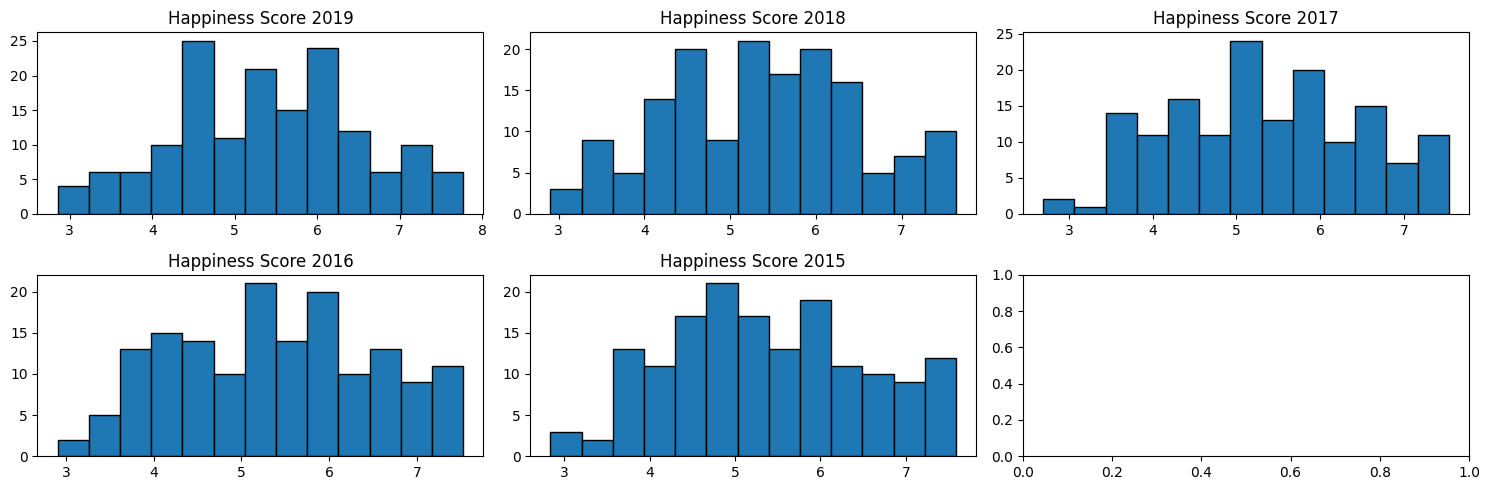

In [38]:
fig, axes = plt.subplots(2, 3, figsize=(15, 5))
axes[0,0].hist(happiness_df["2019"]["Happiness Score"], edgecolor="black", bins=13)
axes[0][0].set_title('Happiness Score 2019')

axes[0,1].hist(happiness_df["2018"]["Happiness Score"], edgecolor="black", bins=13)
axes[0][1].set_title('Happiness Score 2018')

axes[0,2].hist(happiness_df["2017"]["Happiness Score"], edgecolor="black", bins=13)
axes[0][2].set_title('Happiness Score 2017')

axes[1,0].hist(happiness_df["2016"]["Happiness Score"], edgecolor="black", bins=13)
axes[1][0].set_title('Happiness Score 2016')

axes[1,1].hist(happiness_df["2015"]["Happiness Score"], edgecolor="black", bins=13)
axes[1][1].set_title('Happiness Score 2015')

plt.tight_layout()
plt.show()

In [39]:
#readability 10/10
combined_score_df = pd.DataFrame({"2015":happiness_df["2015"]["Happiness Score"],
                                  "2016":happiness_df["2016"]["Happiness Score"],
                                  "2017":happiness_df["2017"]["Happiness Score"],
                                  "2018":happiness_df["2018"]["Happiness Score"],
                                  "2019":happiness_df["2019"]["Happiness Score"]})

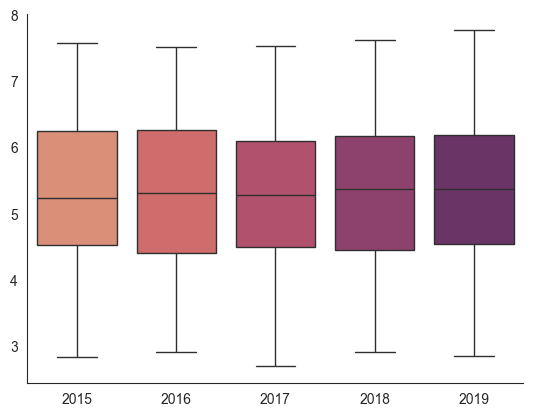

In [40]:
sns.set_style('white')
sns.boxplot(data=combined_score_df, palette='flare')
sns.despine()
plt.show()

### 2. Univariate Non-Graphical analysis: 

In [41]:
happiness_df["2015"].describe().T
happiness_df["2016"].describe().T
happiness_df["2017"].describe().T
happiness_df["2018"].describe().T
happiness_df["2019"].describe().T

,count,mean,std,min,25%,50%,75%,max
Overall rank,156.0,78.500000,45.177428,1.000,39.75000,78.5000,117.25000,156.000
Happiness Score,156.0,5.407096,1.113120,2.853,4.54450,5.3795,6.18450,7.769
Economy (GDP per Capita),156.0,0.905147,0.398389,0.000,0.60275,0.9600,1.23250,1.684
Social support,156.0,1.208814,0.299191,0.000,1.05575,1.2715,1.45250,1.624
Health (Life Expectancy),156.0,0.725244,0.242124,0.000,0.54775,0.7890,0.88175,1.141
Freedom to make life choices,156.0,0.392571,0.143289,0.000,0.30800,0.4170,0.50725,0.631
Generosity,156.0,0.184846,0.095254,0.000,0.10875,0.1775,0.24825,0.566
Trust (Government Corruption),156.0,0.110603,0.094538,0.000,0.04700,0.0855,0.14125,0.453


In [42]:
happiness_df["2015"].describe(include='all').T
happiness_df["2016"].describe(include='all').T
happiness_df["2017"].describe(include='all').T
happiness_df["2018"].describe(include='all').T
happiness_df["2019"].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Overall rank,156.0,NaN,NaN,NaN,78.5,45.177428,1.0,39.75,78.5,117.25,156.0
Country,156,156,Finland,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Happiness Score,156.0,NaN,NaN,NaN,5.407096,1.11312,2.853,4.5445,5.3795,6.1845,7.769
Economy (GDP per Capita),156.0,NaN,NaN,NaN,0.905147,0.398389,0.0,0.60275,0.96,1.2325,1.684
Social support,156.0,NaN,NaN,NaN,1.208814,0.299191,0.0,1.05575,1.2715,1.4525,1.624
Health (Life Expectancy),156.0,NaN,NaN,NaN,0.725244,0.242124,0.0,0.54775,0.789,0.88175,1.141
Freedom to make life choices,156.0,NaN,NaN,NaN,0.392571,0.143289,0.0,0.308,0.417,0.50725,0.631
Generosity,156.0,NaN,NaN,NaN,0.184846,0.095254,0.0,0.10875,0.1775,0.24825,0.566
Trust (Government Corruption),156.0,NaN,NaN,NaN,0.110603,0.094538,0.0,0.047,0.0855,0.14125,0.453


In [43]:
#clean code 10/10
print("(",happiness_df["2015"]["Happiness Score"].mean(),",",happiness_df["2015"]["Happiness Score"].std(),")")
print("(",happiness_df["2016"]["Happiness Score"].mean(),",",happiness_df["2016"]["Happiness Score"].std(),")")
print("(",happiness_df["2017"]["Happiness Score"].mean(),",",happiness_df["2017"]["Happiness Score"].std(),")")
print("(",happiness_df["2018"]["Happiness Score"].mean(),",",happiness_df["2018"]["Happiness Score"].std(),")")
print("(",happiness_df["2019"]["Happiness Score"].mean(),",",happiness_df["2019"]["Happiness Score"].std(),")")

( 5.375734177215189 , 1.1450101349520665 )
( 5.382184713375795 , 1.1416735176005715 )
( 5.354019355773926 , 1.1312300899149939 )
( 5.375916666666667 , 1.119505852731943 )
( 5.407096153846155 , 1.1131198687956712 )


In [44]:
display(happiness_df["2015"]["Happiness Score"].quantile(0.25))
display(happiness_df["2016"]["Happiness Score"].quantile(0.25))
display(happiness_df["2017"]["Happiness Score"].quantile(0.25))
display(happiness_df["2018"]["Happiness Score"].quantile(0.25))
display(happiness_df["2019"]["Happiness Score"].quantile(0.25))

4.526

4.404

4.50550007820129

4.45375

4.5445

## 4. Bivariate/Multivariate Analysis:

**Categorical & Categorical --> (Stacked Column Chart)**

In [62]:
import plotly.express as px

df = px.data.tips()
fig = px.histogram(df, x=happiness_df["2019"]["Country"].head(5), y=happiness_df["2019"]["Happiness Score"].head(5),
                   labels={'x':'Country', "y":"Happiness Score"},
                   histfunc='max',range_y=[6,10],
                  title="Highest Happiness Score in 2019")
fig.show()

**Categorical & numerical --> (scatter plot, histogram, box plot)**

In [ ]:
import plotly.express as px
df = px.data.tips()
fig = px.histogram(df, x=happiness_df["2019"]["Country"].head(5), y=happiness_df["2019"]["Happiness Score"].head(5),
                   labels={'x':'Country or region', "y":"Happiness Score"},
                   histfunc='max',range_y=[6,10],
                  title="Highest Happiness Score in 2019")
fig.show()

fig = px.histogram(df, x=happiness_df["2018"]["Country"].head(5), y=happiness_df["2018"]["Happiness Score"].head(5),
                   labels={'x':'Country or region', "y":"Happiness Score"},
                   histfunc='max',range_y=[6,10],
                  title="Highest Happiness Score in 2018")
fig.show()

fig = px.histogram(df, x=happiness_df["2017"]["Country"].head(5), y=happiness_df["2017"]["Happiness Score"].head(5),
                   labels={'x':'Country or region', "y":"Happiness Score"},
                   histfunc='max',range_y=[6,10],
                  title="Highest Happiness Score in 2017")
fig.show()

fig = px.histogram(df, x=happiness_df["2016"]["Country"].head(5), y=happiness_df["2016"]["Happiness Score"].head(5),
                   labels={'x':'Country or region', "y":"Happiness Score"},
                   histfunc='max',range_y=[6,10],
                  title="Highest Happiness Score in 2016")
fig.show()

fig = px.histogram(df, x=happiness_df["2015"]["Country"].head(5), y=happiness_df["2015"]["Happiness Score"].head(5),
                   labels={'x':'Country or region', "y":"Happiness Score"},
                   histfunc='max',range_y=[6,10],
                  title="Highest Happiness Score in 2015")
fig.show()


**numerical & numerical --> (Scatter plot, line chart)**

In [47]:
happiness_score_df = {"2015":happiness_df["2015"][["Country","Happiness Score"]],
                     "2016":happiness_df["2016"][["Country","Happiness Score"]],
                     "2017":happiness_df["2017"][["Country","Happiness Score"]],
                     "2018":happiness_df["2018"][["Country","Happiness Score"]],
                     "2019":happiness_df["2019"][["Country","Happiness Score"]]}

In [48]:
happiness_score_df["2017"]

,Country,Happiness Score
0,Norway,7.537
1,Denmark,7.522
2,Iceland,7.504
3,Switzerland,7.494
4,Finland,7.469
...,...,...
150,Rwanda,3.471
151,Syria,3.462
152,Tanzania,3.349
153,Burundi,2.905


In [49]:
overall_Happiness_df = pd.merge(happiness_score_df["2015"],happiness_score_df["2016"], on="Country")
overall_Happiness_df = overall_Happiness_df.rename(columns={"Happiness Score_x":"Happiness Score (2015)",
                                                            "Happiness Score_y":"Happiness Score (2016)"})
overall_Happiness_df = pd.merge(overall_Happiness_df,happiness_score_df["2017"], on="Country")
overall_Happiness_df = pd.merge(overall_Happiness_df,happiness_score_df["2018"], on="Country")
overall_Happiness_df = pd.merge(overall_Happiness_df,happiness_score_df["2019"], on="Country")
overall_Happiness_df = overall_Happiness_df.rename(columns={"Happiness Score_x":"Happiness Score (2017)",
                                                            "Happiness Score_y":"Happiness Score (2018)",
                                                            "Happiness Score":"Happiness Score (2019)"})


In [50]:
tmp_Happiness_df = overall_Happiness_df
tmp_Happiness_df = tmp_Happiness_df.drop("Country", axis=1)
tmp_Happiness_df['min Happiness Score'] = tmp_Happiness_df.min(axis=1)
tmp_Happiness_df['max Happiness Score'] = tmp_Happiness_df.max(axis=1)

In [51]:
tmp_Happiness_df.drop(["Happiness Score (2015)", "Happiness Score (2016)", "Happiness Score (2017)",
                      "Happiness Score (2018)", "Happiness Score (2019)"], axis=1)
overall_Happiness_df = pd.merge(overall_Happiness_df, tmp_Happiness_df)
overall_Happiness_df["Difference in Score"] = overall_Happiness_df['max Happiness Score'] - overall_Happiness_df['min Happiness Score']

In [52]:
overall_Happiness_df = overall_Happiness_df.sort_values("Difference in Score", ascending=False, ignore_index=True)

We could also use a correlation matrix to get more specific information about the relationship between these two variables.

In [53]:
score_2015_2016_df = overall_Happiness_df
score_2015_2016_df = score_2015_2016_df.drop(["Happiness Score (2017)", "Happiness Score (2018)", "Happiness Score (2019)",
"min Happiness Score", "max Happiness Score", "Difference in Score"], axis=1)
score_2015_2016_df

,Country,Happiness Score (2015),Happiness Score (2016)
0,Venezuela,6.810,6.084
1,Benin,3.340,3.484
2,Ivory Coast,3.655,3.916
3,Togo,2.839,3.303
4,Algeria,5.605,6.355
...,...,...,...
136,Saudi Arabia,6.411,6.379
137,Iceland,7.561,7.501
138,Ecuador,5.975,5.976
139,New Zealand,7.286,7.334


In [54]:
tmp = score_2015_2016_df
tmp = tmp.drop("Country", axis=1)
tmp['min Happiness Score'] = tmp.min(axis=1)
tmp['max Happiness Score'] = tmp.max(axis=1)
score_2015_2016_df = pd.merge(score_2015_2016_df,tmp)
score_2015_2016_df["Score change (2015-2016)"] = score_2015_2016_df['max Happiness Score'] - score_2015_2016_df['min Happiness Score']
score_2015_2016_df = score_2015_2016_df.sort_values("Score change (2015-2016)", ascending=False, ignore_index=True)
score_2015_2016_df

,Country,Happiness Score (2015),Happiness Score (2016),min Happiness Score,max Happiness Score,Score change (2015-2016)
0,Liberia,4.571,3.622,3.622,4.571,0.949
1,Algeria,5.605,6.355,5.605,6.355,0.750
2,Venezuela,6.810,6.084,6.084,6.810,0.726
3,Haiti,4.518,4.028,4.028,4.518,0.490
4,Togo,2.839,3.303,2.839,3.303,0.464
...,...,...,...,...,...,...
136,Colombia,6.477,6.481,6.477,6.481,0.004
137,Denmark,7.527,7.526,7.526,7.527,0.001
138,Ecuador,5.975,5.976,5.975,5.976,0.001
139,Bulgaria,4.218,4.217,4.217,4.218,0.001


In [55]:
score_2016_2017_df = overall_Happiness_df
score_2016_2017_df = score_2016_2017_df.drop(["Happiness Score (2015)", "Happiness Score (2018)", "Happiness Score (2019)",
"min Happiness Score", "max Happiness Score", "Difference in Score"], axis=1)
score_2016_2017_df

,Country,Happiness Score (2016),Happiness Score (2017)
0,Venezuela,6.084,5.250
1,Benin,3.484,3.657
2,Ivory Coast,3.916,4.180
3,Togo,3.303,3.495
4,Algeria,6.355,5.872
...,...,...,...
136,Saudi Arabia,6.379,6.344
137,Iceland,7.501,7.504
138,Ecuador,5.976,6.008
139,New Zealand,7.334,7.314


In [56]:
tmp = score_2016_2017_df
tmp = tmp.drop("Country", axis=1)
tmp['min Happiness Score'] = tmp.min(axis=1)
tmp['max Happiness Score'] = tmp.max(axis=1)
score_2016_2017_df = pd.merge(score_2016_2017_df,tmp)

In [57]:
score_2016_2017_df["Score change (2016-2017)"] = score_2016_2017_df['max Happiness Score'] - score_2016_2017_df['min Happiness Score']
score_2016_2017_df = score_2016_2017_df.sort_values("Score change (2016-2017)", ascending=False, ignore_index=True)
score_2016_2017_df

,Country,Happiness Score (2016),Happiness Score (2017),min Happiness Score,max Happiness Score,Score change (2016-2017)
0,Venezuela,6.084,5.250,5.250,6.084,8.340000e-01
1,Bulgaria,4.217,4.714,4.217,4.714,4.970002e-01
2,Algeria,6.355,5.872,5.872,6.355,4.829998e-01
3,Afghanistan,3.360,3.794,3.360,3.794,4.339999e-01
4,Haiti,4.028,3.603,3.603,4.028,4.250001e-01
...,...,...,...,...,...,...
136,South Korea,5.835,5.838,5.835,5.838,2.999821e-03
137,Bolivia,5.822,5.823,5.822,5.823,9.999542e-04
138,Japan,5.921,5.920,5.920,5.921,9.999237e-04
139,Burundi,2.905,2.905,2.905,2.905,2.861023e-08


In [58]:
fig = px.histogram(df, x=score_2015_2016_df["Country"].head(5), y=score_2015_2016_df["Score change (2015-2016)"].head(5),
                   labels={'x':'Country or region', "y":"Score change"},
                   histfunc='max',
                  title="Happiness Score Difference(2015-2016)")
fig.show()

In [59]:
fig = px.histogram(df, x=score_2016_2017_df["Country"].head(5), y=score_2016_2017_df["Score change (2016-2017)"].head(5),
                   labels={'x':'Country or region', "y":"Score change"},
                   histfunc='max',
                  title="Happiness Score Difference(2016-2017)")
fig.show()

In [60]:
fig = px.histogram(df, x=overall_Happiness_df["Country"].head(5), y=overall_Happiness_df["Difference in Score"].head(5),
                   labels={'x':'Country or region', "y":"Score change"},
                   histfunc='max',
                  title="maximum Happiness Score Difference(2015-2019)")
fig.show()

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning:

Ign

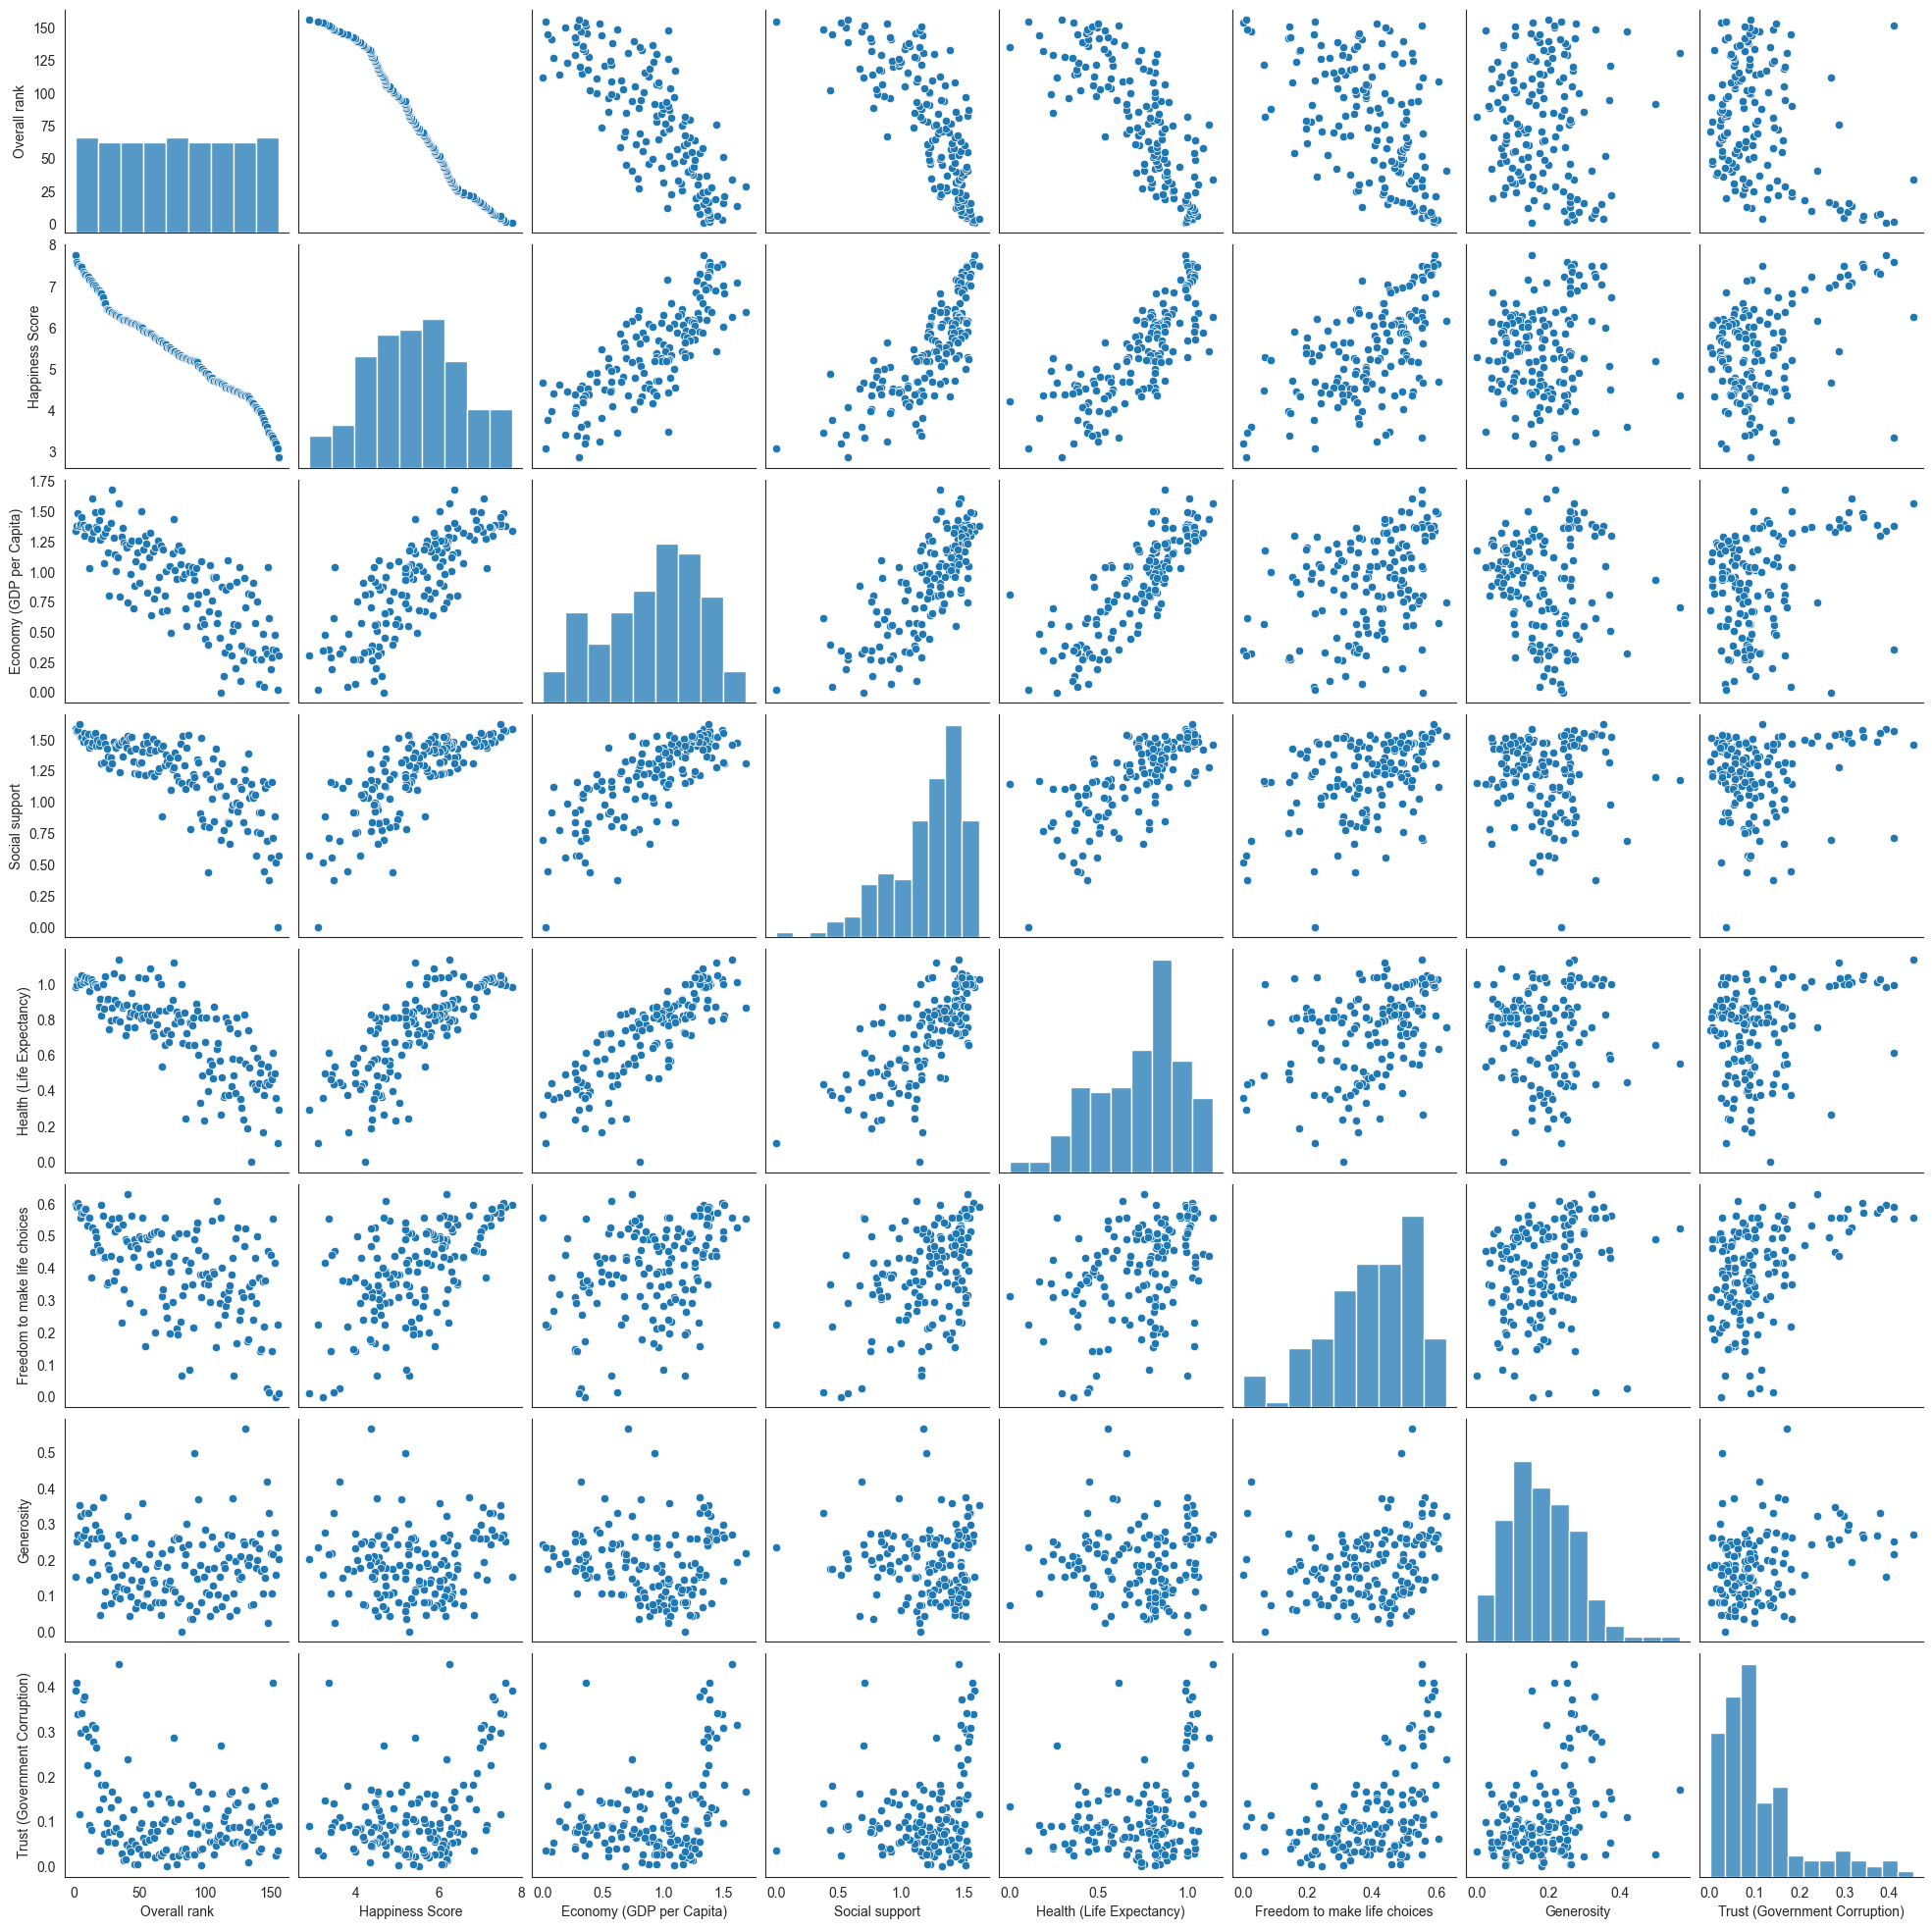

In [61]:
#this is a bonus question to answer if there are any relations between the columns
#i get an error for some reason (same with usecase 1), but the relations are still drawn bellow
sns.pairplot(happiness_df["2019"], palette='coolwarm')